<a href="https://colab.research.google.com/github/AntoniXGaudi/Data_Analysis_1/blob/main/DL_Assignment_1_(Classification_with_ANN_Churn_Prediction)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [ ]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this.") # | vermeidet die blöde Fehlermeldung

You can safely ignore this.


In [ ]:
import os

# | Set tensorflow log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Uncomment the following lines if you want to suppress warnings:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [ ]:
# Get python version
!python --version

Python 3.10.12


In [ ]:
# Get tensorflow version
import tensorflow as tf

tf.__version__

'2.12.0'

In [ ]:
# List cuda-capable gpu's that are attached to this session
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

CPU will be used for this session.


In [ ]:
# Get more information about gpu (if available) |
if tf.config.list_physical_devices("GPU"):
    !nvidia-smi

In [ ]:
from google.colab import drive   # | Notwendig, wenn sich csv in meinem Drive befindet
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/DL/Churn_Modelling.csv')  # | Pfad für Drive: /content/drive/My Drive/+bekannter Ordnerpfad

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# no NaNs

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [ ]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

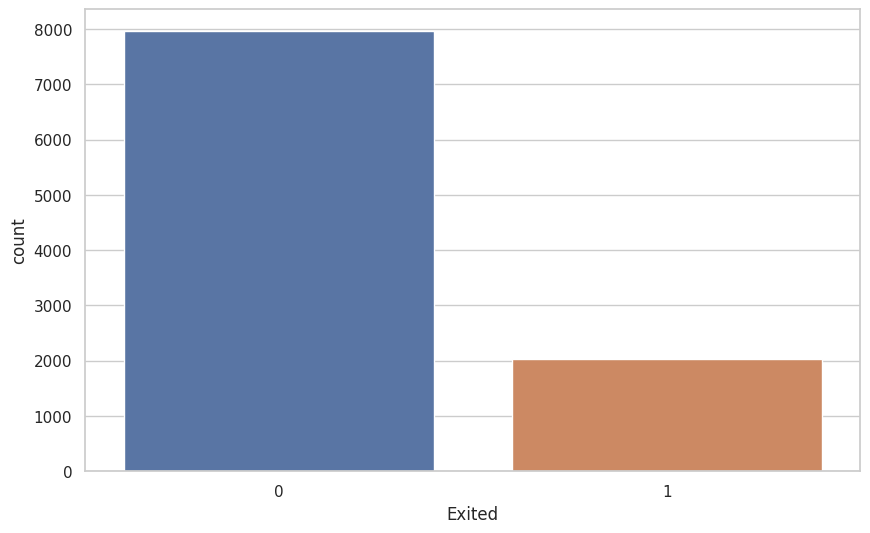

In [ ]:
sns.countplot(x=df["Exited"])

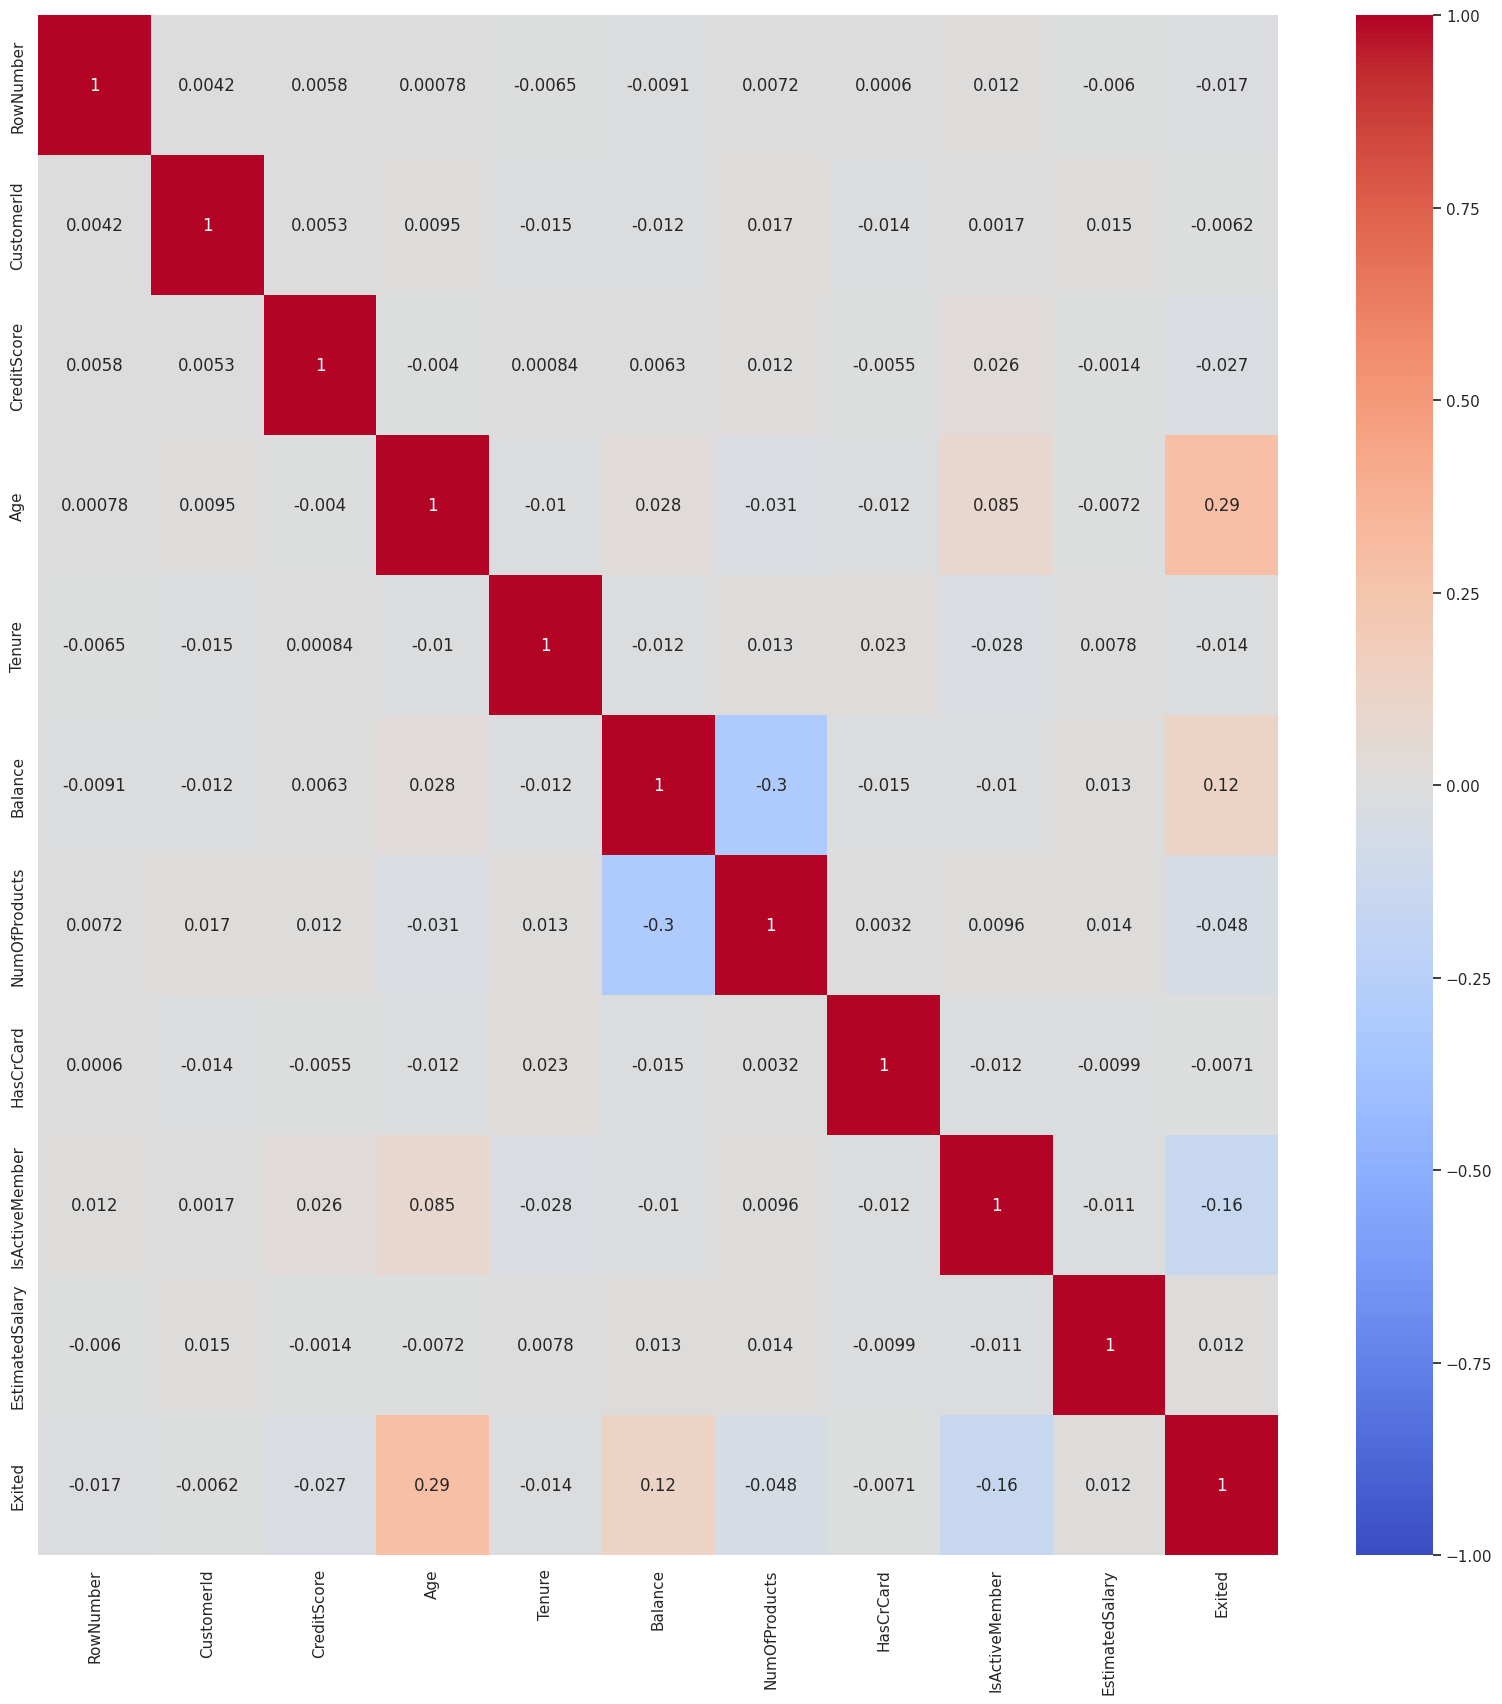

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

In [ ]:
# No strong correlations anywhere!

In [ ]:
# Drop 'RowNumber', 'CustomerId', and 'Surname' columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Display the first few rows of the updated dataframe
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


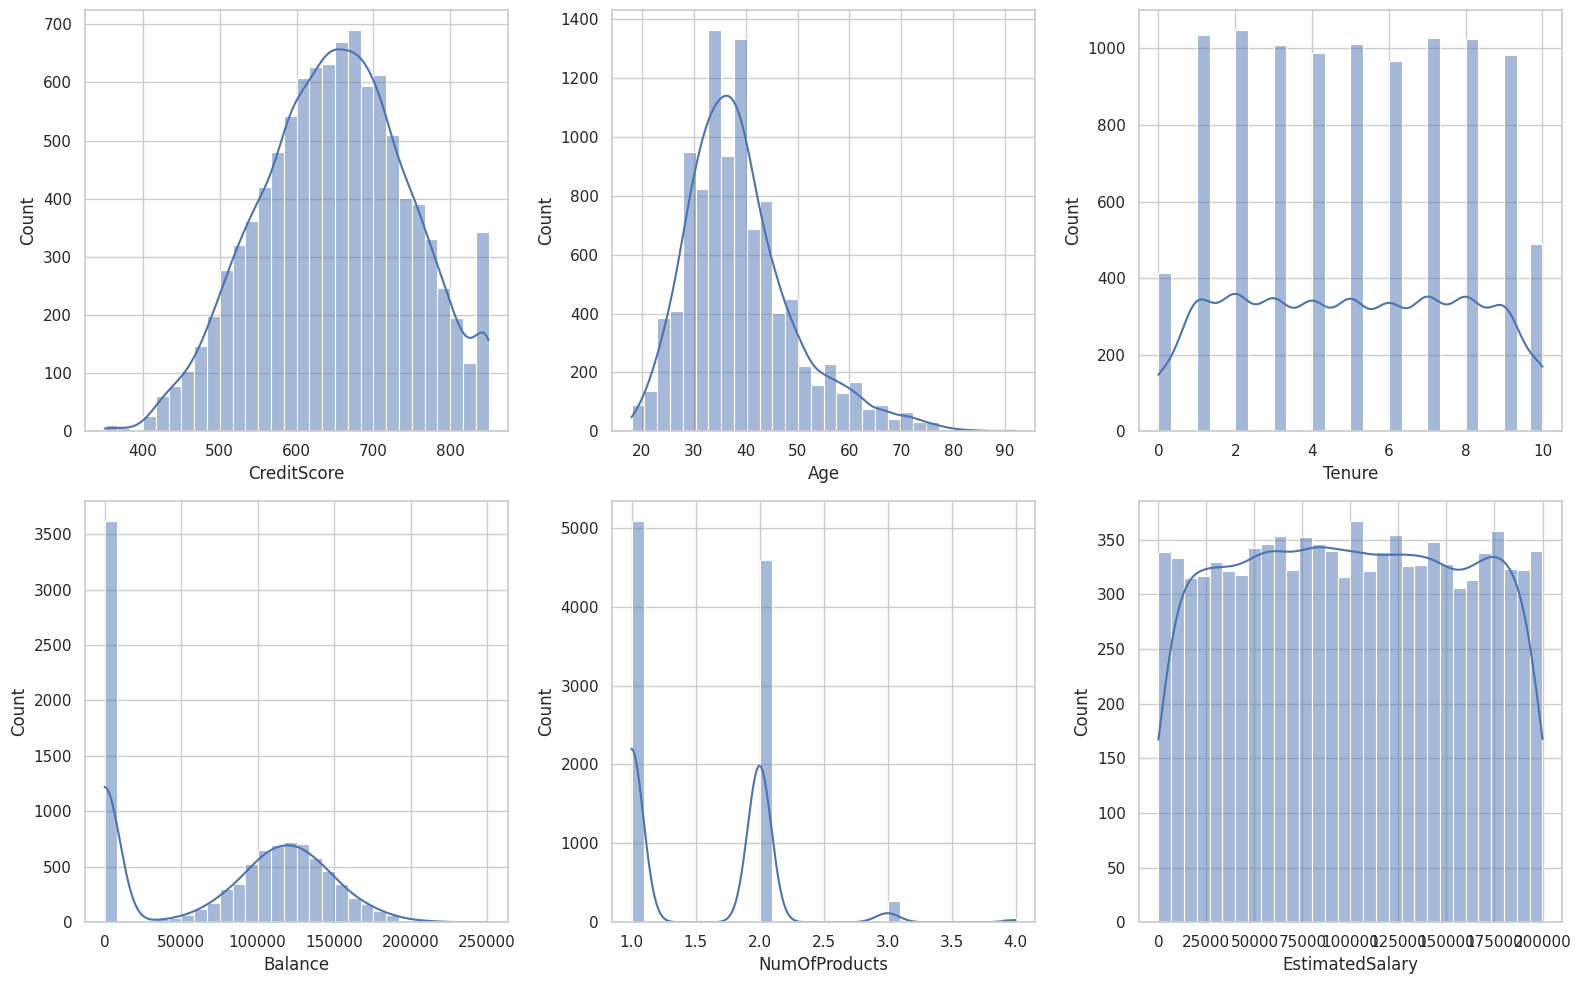

In [ ]:
# Set the style of seaborn plots
sns.set(style='whitegrid')

# List of numerical variables
numerical_variables = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# | Plot histograms for NUMERICAL variables
plt.figure(figsize=(16, 10))
for i, var in enumerate(numerical_variables):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[var], kde=True, bins=30)
plt.tight_layout()
plt.show()


    CreditScore: Most of the customers have a credit score between 600 and 700.
    Age: The majority of the bank's customers are between 30 and 50 years old.
    Tenure: The number of years a customer has been with the bank is fairly evenly distributed.
    Balance: A significant number of customers have a balance of zero, while the rest are evenly distributed.
    NumOfProducts: Most customers use 1 or 2 banking products.
    EstimatedSalary: The estimated salary is evenly distributed across the range.

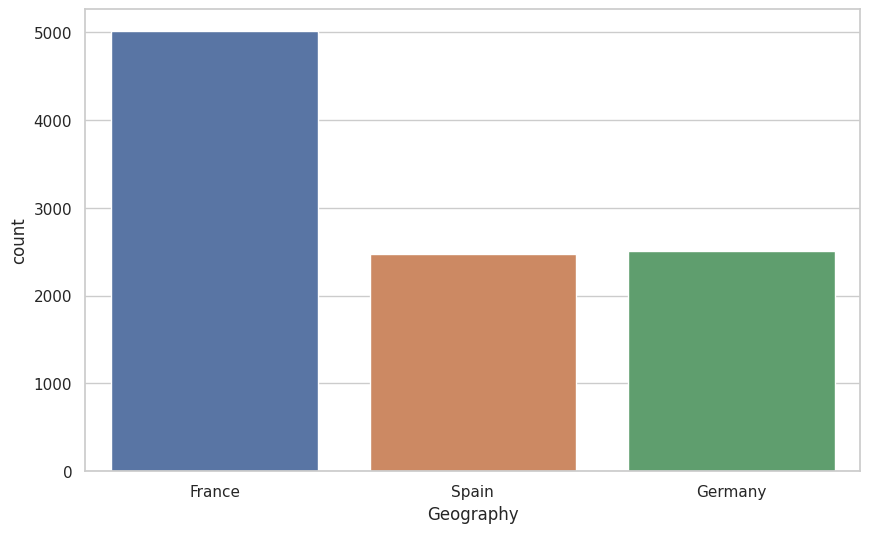

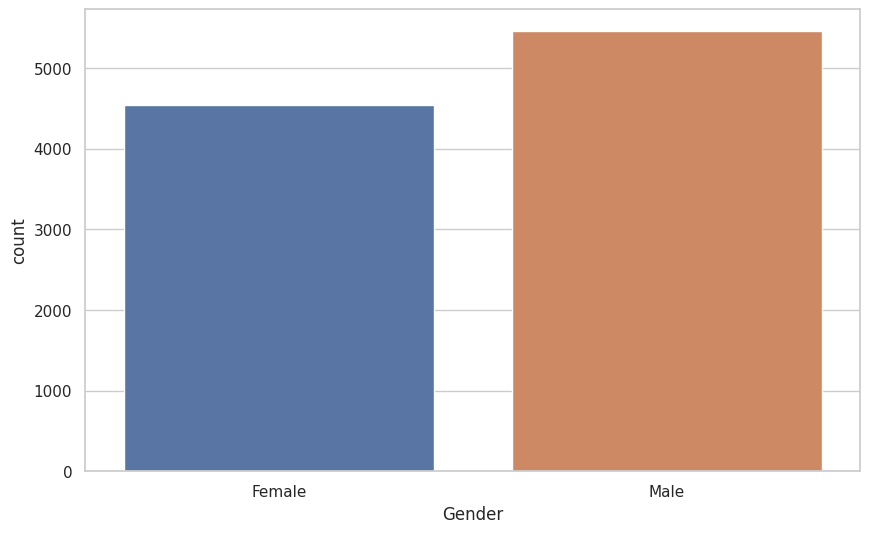

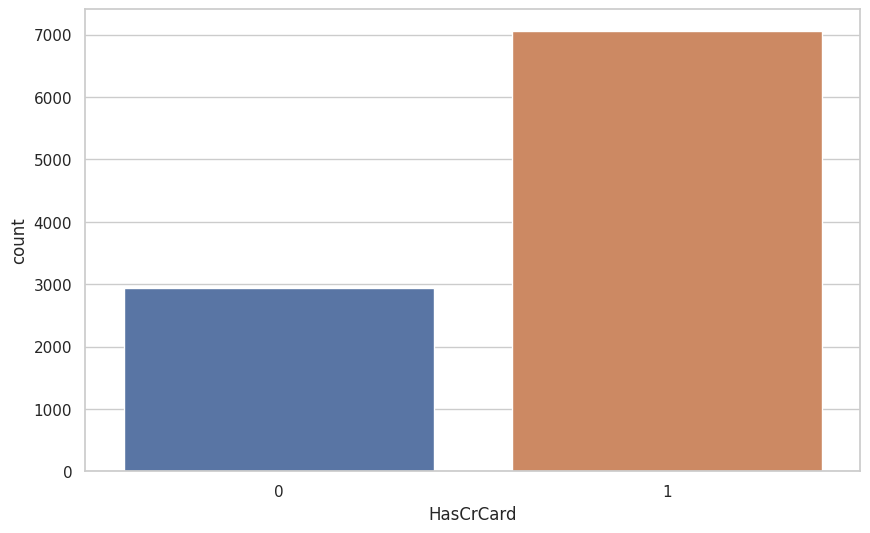

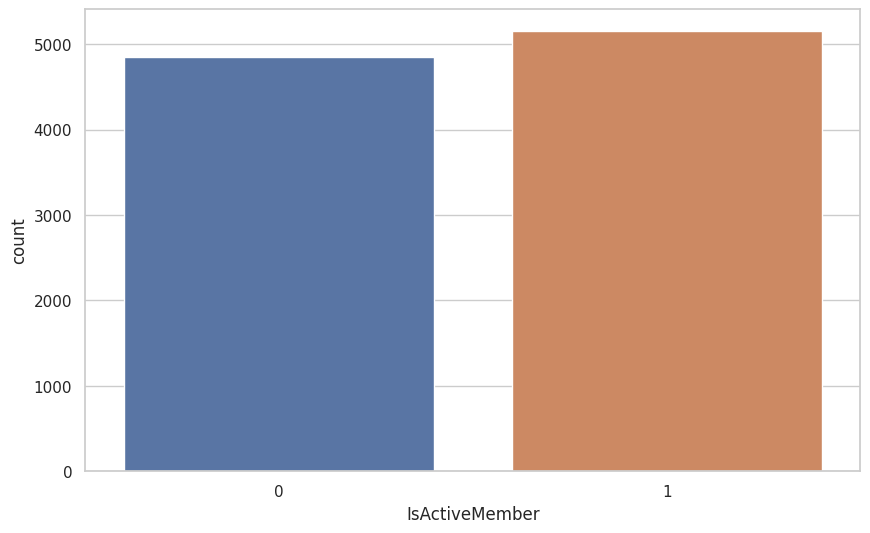

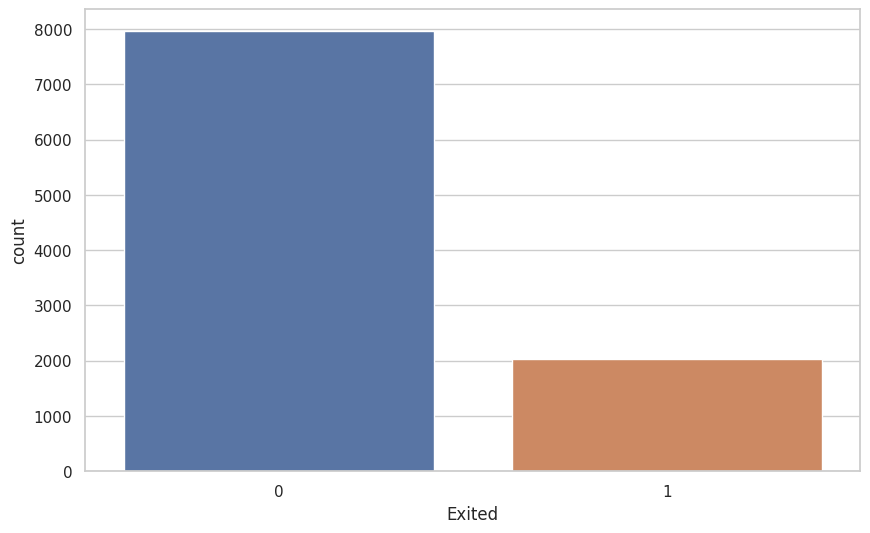

In [ ]:
categorical_variables = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

for var in categorical_variables:
    sns.countplot(x=var, data=df)
    plt.show()



In [ ]:
# Convert 'Geography' and 'Gender' to dummy variables
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Display the first few rows of the updated dataframe
df.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


# Preprocessing of Data
- Train | Test Split, Scalling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [ ]:

seed = 42  # control the randomness

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.10, random_state=seed  # try 10%, then check results, otherwise increase it, we only have 55 observations to validate the data
) # stratify=y: we want to keep the same distrib. in test and train set (60: 40)
# we FIRST split the data, THEN we scale it |

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train) # || The _transform() actually does the scaling:
# The fit_transform function is used on the training data (X_train). This
# function first fits the scaler to the data, calculating the minimum and maximum values for each feature in the training
# set. Then, it applies the scaling transformation to the training data, so that each feature is scaled to a range between
#  0 and 1. This is done by subtracting the minimum value and dividing by the range (difference between maximum and minimum
# values) for each feature.
X_test = scaler.transform(X_test) #  This function applies the same scaling transformation to the test data as was
# | learned from the training data.

# Modelling & Model Performance

## without class_weigth

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train.shape

(9000, 11)

In [ ]:
X_test.shape

(1000, 11)

### Create The Model

In [ ]:
tf.random.set_seed(seed) # | die übl. Vorgehensweise. Schritt 0: set_seed(), Schritt 1: model = Sequential(), Schritt 2: adding different layers to Output: model.add(...)
# Layer, Schritt 3: model.compile()

model = Sequential() # |  line "model = Sequential()" creates a new neural network model. The "Sequential" model is a linear stack of
# layers, where you can add different layers to build your neural network. Each layer in the model flows sequentially from input to output,
# hence the name "Sequential."

model.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))  # 24 x 1,5 = 36, rule of thumb, input_shape = (128, 128, 3)
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid")) # binary classification, sigmoid 0 or 1, threshold

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=128, epochs=200, verbose=1  # |10% will be test data, we have 1000 epochs, after each epoch, we will use the validation data
)

Epoch 1/200
64/64 [==============================] - 1s 7ms/step - loss: 0.6306 - accuracy: 0.6527 - val_loss: 0.5367 - val_accuracy: 0.7989
Epoch 2/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5173 - accuracy: 0.7960 - val_loss: 0.5042 - val_accuracy: 0.7989
Epoch 3/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5009 - accuracy: 0.7960 - val_loss: 0.4894 - val_accuracy: 0.7989
Epoch 4/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4892 - accuracy: 0.7960 - val_loss: 0.4758 - val_accuracy: 0.7989
Epoch 5/200
64/64 [==============================] - 0s 4ms/step - loss: 0.4797 - accuracy: 0.7960 - val_loss: 0.4648 - val_accuracy: 0.7989
Epoch 6/200
64/64 [==============================] - 0s 4ms/step - loss: 0.4713 - accuracy: 0.7960 - val_loss: 0.4560 - val_accuracy: 0.7989
Epoch 7/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4651 - accuracy: 0.7962 - val_loss: 0.4475 - val_accuracy: 0.7967
Epoch 8/200
6

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.631,0.653,0.537,0.799
1,0.517,0.796,0.504,0.799
2,0.501,0.796,0.489,0.799
3,0.489,0.796,0.476,0.799
4,0.480,0.796,0.465,0.799


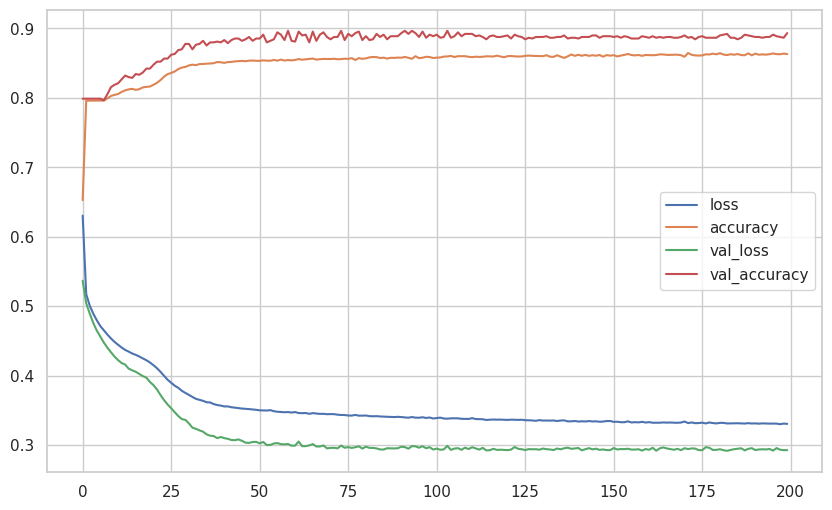

In [ ]:
loss_df.plot() # check history to check the model's performance
plt.show()

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
model.summary()

Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_426 (Dense)           (None, 16)                192       
                                                                 
 dense_427 (Dense)           (None, 8)                 136       
                                                                 
 dense_428 (Dense)           (None, 1)                 9         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.evaluate(X_test, y_test, verbose=0)

[0.33955711126327515, 0.8610000014305115]

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0) # loss, accuracy
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.33955711126327515
accuracy:  0.8610000014305115


In [ ]:
y_pred = model.predict(X_test) > 0.5 # threshold
print(confusion_matrix(y_test, y_pred)) # | confusion_matrix & classification_report (y_test, y_pred), just good old friends. Metrics in confusion matrix can only be derived from test set!!
print(classification_report(y_test, y_pred)) # | Nr. of observations in X_test = 1000, must be equal to Sum of confusion matrix = 765 + 31 + 106 +98 = 1000.

32/32 [==============================] - 0s 1ms/step
[[768  28]
 [111  93]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       796
           1       0.77      0.46      0.57       204

    accuracy                           0.86      1000
   macro avg       0.82      0.71      0.74      1000
weighted avg       0.85      0.86      0.85      1000



In [ ]:
# very bad values for class 1 (without class_weigth)

32/32 [==============================] - 0s 917us/step


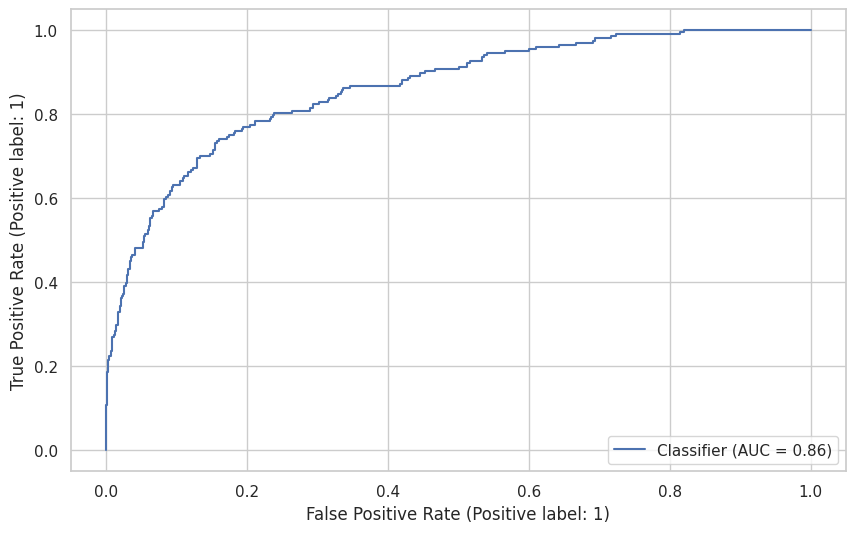

In [ ]:
y_pred_proba = model.predict(X_test)  # || Draswing RocCurve procedure: 1) y_pred_proba = model.predict(X_test), 2) RocCurveDisplay.from_predictions(y_test, y_pred_proba)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [ ]:
roc_auc_score(y_test, y_pred_proba)

0.861673563897921

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [ ]:
tf.random.set_seed(seed) # | die übl. Vorgehensweise. Schritt 0: set_seed(), Schritt 1: model = Sequential(), Schritt 2: adding different layers 2 to Output
# Layer, Schritt 3: model.compile()

model = Sequential() # |  line "model = Sequential()" creates a new neural network model. The "Sequential" model is a linear stack of
# layers, where you can add different layers to build your neural network. Each layer in the model flows sequentially from input to output,
# hence the name "Sequential."

model.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))  # 24 x 1,5 = 36, rule of thumb, input_shape = (128, 128, 3)
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid")) # binary classification, sigmoid 0 or 1, threshold

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
from sklearn.utils import class_weight # | Class weights proportional to Not Exited vs Exited
class_weights = class_weight.compute_class_weight('balanced', classes = np.unique(y_train), y = y_train) # | creating class weights
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [ ]:
model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,  # |10% will be test data, we have 1000 epochs, after each epoch, we will use the validation data
    batch_size=128,
    epochs=200,
    verbose=1,
    class_weight = class_weights # | now we have class_weight, so we need to add that parameter
)

Epoch 1/200
64/64 [==============================] - 1s 5ms/step - loss: 0.7038 - accuracy: 0.2422 - val_loss: 0.7205 - val_accuracy: 0.3978
Epoch 2/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6712 - accuracy: 0.5043 - val_loss: 0.6836 - val_accuracy: 0.6189
Epoch 3/200
64/64 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.6195 - val_loss: 0.6245 - val_accuracy: 0.6967
Epoch 4/200
64/64 [==============================] - 0s 2ms/step - loss: 0.6301 - accuracy: 0.6409 - val_loss: 0.5935 - val_accuracy: 0.7222
Epoch 5/200
64/64 [==============================] - 0s 2ms/step - loss: 0.6181 - accuracy: 0.6653 - val_loss: 0.6234 - val_accuracy: 0.6844
Epoch 6/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6066 - accuracy: 0.6642 - val_loss: 0.5680 - val_accuracy: 0.7211
Epoch 7/200
64/64 [==============================] - 0s 2ms/step - loss: 0.5970 - accuracy: 0.6710 - val_loss: 0.5982 - val_accuracy: 0.6811
Epoch 8/200
6

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.704,0.242,0.720,0.398
1,0.671,0.504,0.684,0.619
2,0.648,0.620,0.624,0.697
3,0.630,0.641,0.594,0.722
4,0.618,0.665,0.623,0.684
...,...,...,...,...
195,0.461,0.779,0.416,0.812
196,0.461,0.788,0.423,0.814
197,0.459,0.781,0.445,0.784
198,0.461,0.782,0.435,0.791


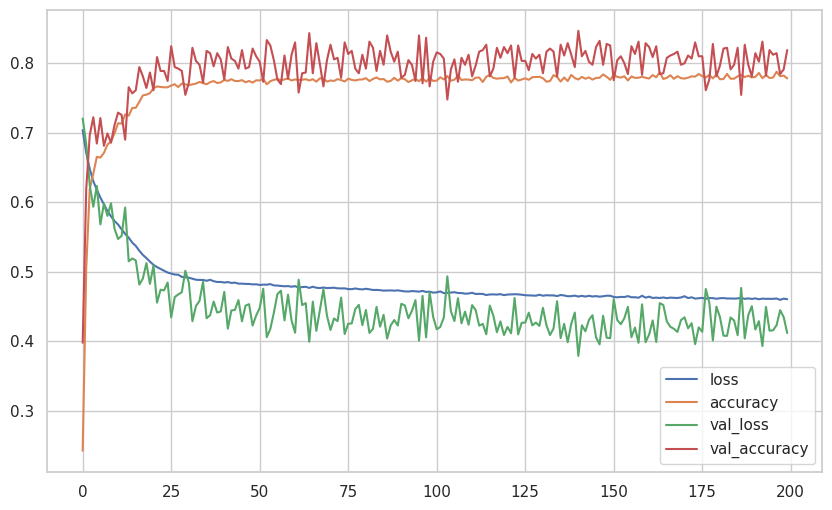

In [ ]:
loss_df.plot() # check history to check the model's performance
plt.show()

In [ ]:
# much worse metrics with class_weights, val_loss with high variance

In [ ]:
model.summary()

Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_429 (Dense)           (None, 16)                192       
                                                                 
 dense_430 (Dense)           (None, 8)                 136       
                                                                 
 dense_431 (Dense)           (None, 1)                 9         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.evaluate(X_test, y_test, verbose=0)

[0.4505097568035126, 0.7879999876022339]

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0) # loss, accuracy
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.4505097568035126
accuracy:  0.7879999876022339


In [ ]:
y_pred = model.predict(X_test) > 0.5 # threshold
print(confusion_matrix(y_test, y_pred)) # | confusion_matrix & classification_report (y_test, y_pred), just good old friends
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[630 166]
 [ 46 158]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.86       796
           1       0.49      0.77      0.60       204

    accuracy                           0.79      1000
   macro avg       0.71      0.78      0.73      1000
weighted avg       0.84      0.79      0.80      1000



In [ ]:
# bad values for both classes (with class_weigth)

32/32 [==============================] - 0s 2ms/step


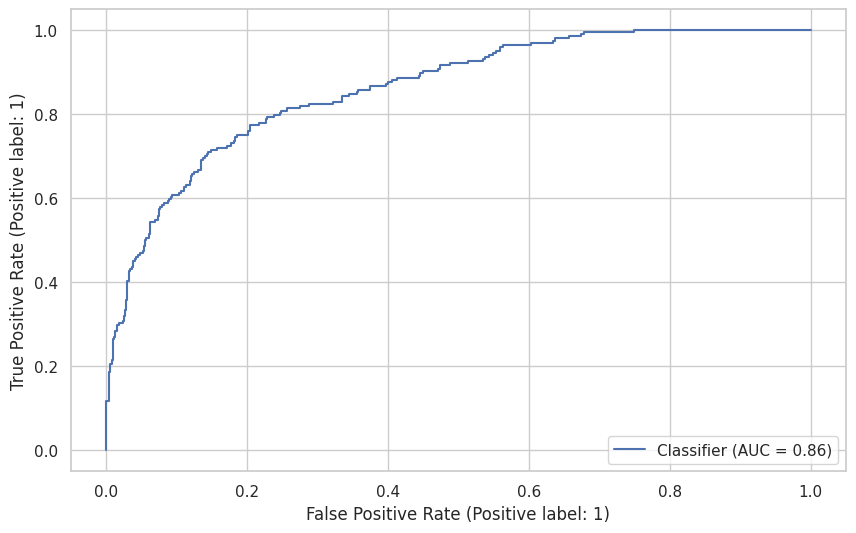

In [ ]:
y_pred_proba = model.predict(X_test)  # like ML
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [ ]:
# AUC almost the same with and wihtout weights

In [ ]:
roc_auc_score(y_test, y_pred_proba)

0.861162429796039

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
tf.random.set_seed(seed) # | die übl. Vorgehensweise. Schritt 0: set_seed(), Schritt 1: model = Sequential(), Schritt 2: adding different layers 2 to Output
# Layer, Schritt 3: model.compile()

model = Sequential() # |  line "model = Sequential()" creates a new neural network model. The "Sequential" model is a linear stack of
# layers, where you can add different layers to build your neural network. Each layer in the model flows sequentially from input to output,
# hence the name "Sequential."

model.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))  # 24 x 1,5 = 36, rule of thumb, input_shape = (128, 128, 3)
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid")) # binary classification, sigmoid 0 or 1, threshold

opt = Adam(learning_rate=0.005)   # | Increasing Learning Rate
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=32,
    epochs=200,
    verbose=1,
)

Epoch 1/200
254/254 [==============================] - 2s 2ms/step - loss: 0.4630 - accuracy: 0.8042 - val_loss: 0.4129 - val_accuracy: 0.8211
Epoch 2/200
254/254 [==============================] - 0s 2ms/step - loss: 0.4041 - accuracy: 0.8275 - val_loss: 0.3599 - val_accuracy: 0.8500
Epoch 3/200
254/254 [==============================] - 0s 2ms/step - loss: 0.3766 - accuracy: 0.8427 - val_loss: 0.3285 - val_accuracy: 0.8789
Epoch 4/200
254/254 [==============================] - 0s 2ms/step - loss: 0.3707 - accuracy: 0.8423 - val_loss: 0.3142 - val_accuracy: 0.8778
Epoch 5/200
254/254 [==============================] - 0s 2ms/step - loss: 0.3668 - accuracy: 0.8431 - val_loss: 0.3169 - val_accuracy: 0.8767
Epoch 6/200
254/254 [==============================] - 0s 2ms/step - loss: 0.3636 - accuracy: 0.8464 - val_loss: 0.3116 - val_accuracy: 0.8811
Epoch 7/200
254/254 [==============================] - 0s 2ms/step - loss: 0.3601 - accuracy: 0.8493 - val_loss: 0.3071 - val_accuracy: 0.8844

<Axes: >

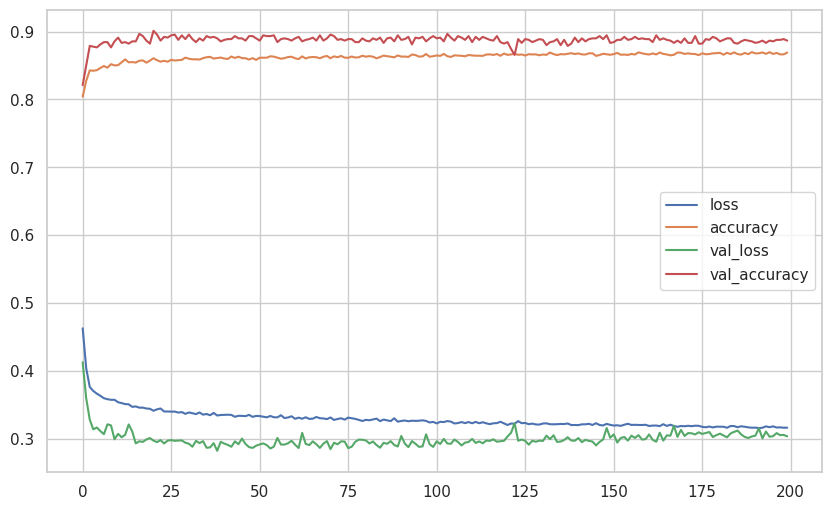

In [ ]:
loss_df = pd.DataFrame(model.history.history) # | plotting history: standard procedure
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3434522747993469
accuracy:  0.8519999980926514


In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) # increasing learning rate, quite different results, but equally bad

32/32 [==============================] - 0s 992us/step
[[761  35]
 [113  91]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.72      0.45      0.55       204

    accuracy                           0.85      1000
   macro avg       0.80      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000



32/32 [==============================] - 0s 1ms/step


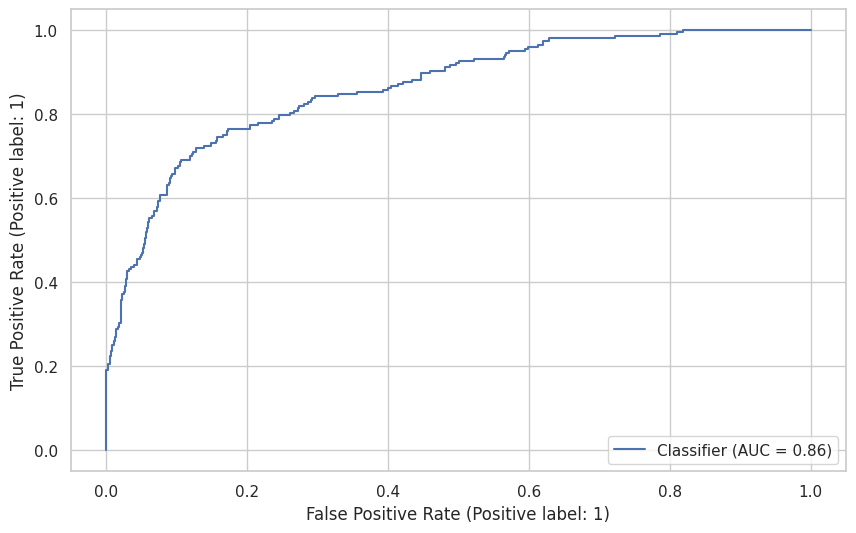

In [ ]:
y_pred_proba = model.predict(X_test)  # like ML
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [ ]:
roc_auc_score(y_test, y_pred_proba)

0.8634840871021775

### Add Dropout Layer

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

# | Was ändert sich am NN building, wenn ich Dropout dazunehme? nach JEDER HIDDEN LAYER kommt ein §model.add(Dropout(0.X))"

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.5)) # | we decrease complexitity and try to increase generalization

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5)) # |

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5)) # |

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=200, verbose=1
)

Epoch 1/200
254/254 [==============================] - 1s 3ms/step - loss: 0.5717 - accuracy: 0.7628 - val_loss: 0.4923 - val_accuracy: 0.7989
Epoch 2/200
254/254 [==============================] - 1s 2ms/step - loss: 0.5329 - accuracy: 0.7957 - val_loss: 0.4885 - val_accuracy: 0.7989
Epoch 3/200
254/254 [==============================] - 0s 2ms/step - loss: 0.5084 - accuracy: 0.7960 - val_loss: 0.4688 - val_accuracy: 0.7989
Epoch 4/200
254/254 [==============================] - 0s 2ms/step - loss: 0.5023 - accuracy: 0.7960 - val_loss: 0.4566 - val_accuracy: 0.7989
Epoch 5/200
254/254 [==============================] - 1s 2ms/step - loss: 0.4969 - accuracy: 0.7959 - val_loss: 0.4619 - val_accuracy: 0.7989
Epoch 6/200
254/254 [==============================] - 1s 2ms/step - loss: 0.4891 - accuracy: 0.7962 - val_loss: 0.4520 - val_accuracy: 0.7989
Epoch 7/200
254/254 [==============================] - 1s 2ms/step - loss: 0.4831 - accuracy: 0.7960 - val_loss: 0.4480 - val_accuracy: 0.7989

<Axes: >

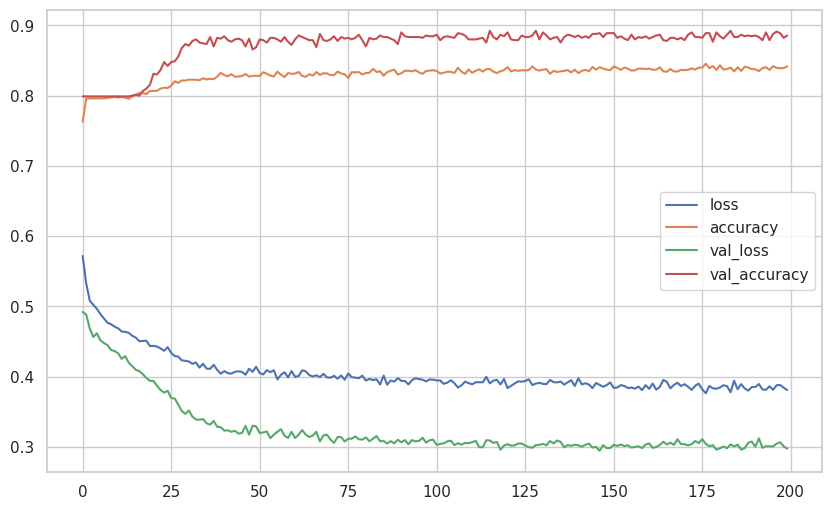

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.33814582228660583
accuracy:  0.8650000095367432


In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))  # confusion matrix after adding dropout layer

32/32 [==============================] - 0s 1ms/step
[[774  22]
 [113  91]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       796
           1       0.81      0.45      0.57       204

    accuracy                           0.86      1000
   macro avg       0.84      0.71      0.75      1000
weighted avg       0.86      0.86      0.85      1000



### Add Early Stop

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Recall  # |have to import recall

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=[Recall()]) # | metrics = recall

In [ ]:
# | nur 2 Veränderungen, um EarlyStopping in NN building dazuzunehmen: 1) Def. early_stop (s. below) 2) callbacks=[early_stop] in model.fit()
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True  # when we use monitor="accuracy", THEN mode="max"
)

In [ ]:
model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=32,
    epochs=200,
    verbose=1,
    callbacks=[early_stop], # | kommt neu ins Spiel
)

Epoch 1/200
254/254 [==============================] - 2s 3ms/step - loss: 0.4862 - recall_2: 0.0000e+00 - val_loss: 0.4454 - val_recall_2: 0.0000e+00
Epoch 2/200
254/254 [==============================] - 1s 2ms/step - loss: 0.4551 - recall_2: 0.0139 - val_loss: 0.4299 - val_recall_2: 0.0276
Epoch 3/200
254/254 [==============================] - 1s 2ms/step - loss: 0.4413 - recall_2: 0.0950 - val_loss: 0.4094 - val_recall_2: 0.1934
Epoch 4/200
254/254 [==============================] - 1s 2ms/step - loss: 0.4273 - recall_2: 0.1792 - val_loss: 0.3914 - val_recall_2: 0.3481
Epoch 5/200
254/254 [==============================] - 1s 2ms/step - loss: 0.4068 - recall_2: 0.2954 - val_loss: 0.3618 - val_recall_2: 0.3260
Epoch 6/200
254/254 [==============================] - 1s 3ms/step - loss: 0.3852 - recall_2: 0.3414 - val_loss: 0.3345 - val_recall_2: 0.4586
Epoch 7/200
254/254 [==============================] - 1s 3ms/step - loss: 0.3697 - recall_2: 0.4068 - val_loss: 0.3236 - val_recall_2

#### Monitor the "val_loss" as metric

#### Monitor the "val_recall" as metric

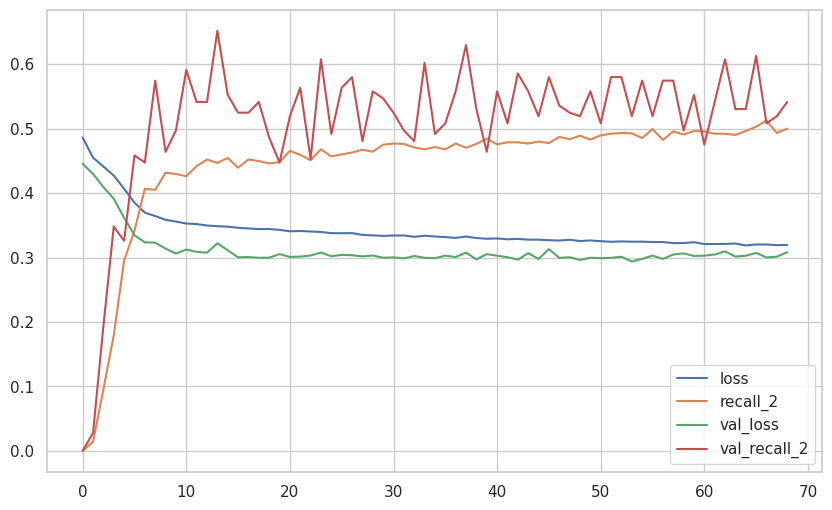

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [ ]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.34491607546806335
recall:  0.4313725531101227


In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))  # Early stop

32/32 [==============================] - 0s 1ms/step
[[766  30]
 [116  88]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.75      0.43      0.55       204

    accuracy                           0.85      1000
   macro avg       0.81      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000



## Optuna

In [ ]:
!pip install optuna

In [ ]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam  # |
import optuna

In [ ]:
early_stop = EarlyStopping(  # we are creating our early_stop variable
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [ ]:
trial_metric = "accuracy"
batch_size = 64


def create_model(trial): # trial   1)
    # | Before we built the NN model, we define the search space for hyperparameters we want to optimize:
    input_layer_units = trial.suggest_int("input_layer_units", 8, 256)  # we create a dict, with key and the values
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam]) # 4 optimizers
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 5e-1)

    # then we build the model
    tf.random.set_seed(42)
    model = Sequential()

    # I am adding an input layer:
    model.add(Dense(input_layer_units, input_dim=X_train.shape[1], activation="relu"))

    # you can add the hidden layers automatically, see the example below:
    hidden_layers = trial.suggest_int("hidden_layers", 2, 6)
    for i in range(hidden_layers):
      hidden_layer_units = "hidden_layer_units_" + str(i)
      hidden_layer_units = trial.suggest_int(hidden_layer_units, 8, 128)
      model.add(Dense(hidden_layer_units, activation="relu"))


    # we decided to use one neuron with sigmoid func in the output layer
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)  # 2)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)  # w0 and w1 are hyperparameters being optimized using Optuna's
    w1 = trial.suggest_loguniform("w1", 0.01, 5)  # suggest_loguniform function. They are used as class weights in
    model.fit(                                    # the binary classification problem to address class imbalance during model training.
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1}, #  assign different weights to the classes in the binary classification problem. This can be helpful when dealing with imbalanced datasets
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]  #  After training the model, it evaluates the model's performance on the validation data using the model.evaluate method. The [1] index is used to extract the value of the specified trial metric (which is "accuracy" in this case).
    return score

In [ ]:
study = optuna.create_study(direction="maximize")  # maximize the metrics (=accuracy, declared in compile(..))
study.optimize(objective, n_trials=10) # 3)
study.best_params # || AM ENDE stehen die OPTIMIERTEN HYPERPARAMETER. MIt diesen Parametern kann ich dann mein FINAL Model zurechtschneidern

[I 2023-08-06 19:04:39,789] A new study created in memory with name: no-name-ac421a60-9a26-42c0-9ce4-62d6e20fcde9


Restoring model weights from the end of the best epoch: 19.
Epoch 34: early stopping


[I 2023-08-06 19:05:23,382] Trial 0 finished with value: 0.7960000038146973 and parameters: {'input_layer_units': 28, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.10168763974863046, 'hidden_layers': 3, 'hidden_layer_units_0': 49, 'hidden_layer_units_1': 90, 'hidden_layer_units_2': 56, 'w0': 3.083642235341916, 'w1': 0.01027528172943278}. Best is trial 0 with value: 0.7960000038146973.


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-08-06 19:05:31,787] Trial 1 finished with value: 0.42800000309944153 and parameters: {'input_layer_units': 243, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.01534990332242304, 'hidden_layers': 2, 'hidden_layer_units_0': 125, 'hidden_layer_units_1': 101, 'w0': 0.047873002699301836, 'w1': 1.7786222010276667}. Best is trial 0 with value: 0.7960000038146973.
[I 2023-08-06 19:06:14,227] Trial 2 finished with value: 0.7960000038146973 and parameters: {'input_layer_units': 178, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.012675776844264759, 'hidden_layers': 4, 'hidden_layer_units_0': 91, 'hidden_layer_units_1': 35, 'hidden_layer_units_2': 64, 'hidden_layer_units_3': 45, 'w0': 0.08640880955335913, 'w1': 0.10446402540356114}. Best is trial 0 with value: 0.7960000038146973.
[I 2023-08-06 19:06:51,697] Trial 3 finished with value: 0.7379999756813049 and parameters: {'input_layer_units': 220, 'optimizer': <class 'keras.optimizers.a

Restoring model weights from the end of the best epoch: 7.
Epoch 22: early stopping


[I 2023-08-06 19:07:46,764] Trial 5 finished with value: 0.8429999947547913 and parameters: {'input_layer_units': 34, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.009728018550928369, 'hidden_layers': 6, 'hidden_layer_units_0': 59, 'hidden_layer_units_1': 100, 'hidden_layer_units_2': 43, 'hidden_layer_units_3': 43, 'hidden_layer_units_4': 12, 'hidden_layer_units_5': 66, 'w0': 0.02650579126986928, 'w1': 0.09720993340185084}. Best is trial 5 with value: 0.8429999947547913.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-08-06 19:07:58,229] Trial 6 finished with value: 0.20399999618530273 and parameters: {'input_layer_units': 175, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.028960628705899966, 'hidden_layers': 4, 'hidden_layer_units_0': 73, 'hidden_layer_units_1': 67, 'hidden_layer_units_2': 76, 'hidden_layer_units_3': 63, 'w0': 0.07357569259073522, 'w1': 1.157625173555115}. Best is trial 5 with value: 0.8429999947547913.


Restoring model weights from the end of the best epoch: 3.
Epoch 18: early stopping


[I 2023-08-06 19:08:10,019] Trial 7 finished with value: 0.7960000038146973 and parameters: {'input_layer_units': 23, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.28901236248579565, 'hidden_layers': 6, 'hidden_layer_units_0': 127, 'hidden_layer_units_1': 32, 'hidden_layer_units_2': 79, 'hidden_layer_units_3': 119, 'hidden_layer_units_4': 45, 'hidden_layer_units_5': 31, 'w0': 2.3806333575750216, 'w1': 0.05085879891491482}. Best is trial 5 with value: 0.8429999947547913.


Restoring model weights from the end of the best epoch: 16.
Epoch 31: early stopping


[I 2023-08-06 19:08:34,204] Trial 8 finished with value: 0.7960000038146973 and parameters: {'input_layer_units': 35, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.27525084011609974, 'hidden_layers': 6, 'hidden_layer_units_0': 29, 'hidden_layer_units_1': 17, 'hidden_layer_units_2': 45, 'hidden_layer_units_3': 121, 'hidden_layer_units_4': 75, 'hidden_layer_units_5': 121, 'w0': 4.602038754039882, 'w1': 0.2885249254522595}. Best is trial 5 with value: 0.8429999947547913.


Restoring model weights from the end of the best epoch: 42.
Epoch 57: early stopping


[I 2023-08-06 19:08:56,224] Trial 9 finished with value: 0.8259999752044678 and parameters: {'input_layer_units': 30, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.0006236684491499843, 'hidden_layers': 2, 'hidden_layer_units_0': 59, 'hidden_layer_units_1': 81, 'w0': 0.6270601363914838, 'w1': 0.042366289497674695}. Best is trial 5 with value: 0.8429999947547913.


{'input_layer_units': 34,
 'optimizer': keras.optimizers.nadam.Nadam,
 'learning_rate': 0.009728018550928369,
 'hidden_layers': 6,
 'hidden_layer_units_0': 59,
 'hidden_layer_units_1': 100,
 'hidden_layer_units_2': 43,
 'hidden_layer_units_3': 43,
 'hidden_layer_units_4': 12,
 'hidden_layer_units_5': 66,
 'w0': 0.02650579126986928,
 'w1': 0.09720993340185084}

In [ ]:
# build model with optuna parameters
input_layer_units, hidden_layers, optimizer, lr, w0, w1 = (
    study.best_params["input_layer_units"],
    study.best_params["hidden_layers"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

# modify the hidden layers' neuron numbers according to the output of the previous code block
hidden_layer_units_1, hidden_layer_units_2 , hidden_layer_units_3, hidden_layer_units_4, hidden_layer_units_5, hidden_layer_units_6 = (
    study.best_params["hidden_layer_units_0"],
    study.best_params["hidden_layer_units_1"],
    study.best_params["hidden_layer_units_2"],
    study.best_params["hidden_layer_units_3"],
    study.best_params["hidden_layer_units_4"],
    study.best_params["hidden_layer_units_5"]
)

hidden_layer_units = [
             hidden_layer_units_1,
             hidden_layer_units_2,
             hidden_layer_units_3,
             hidden_layer_units_4,
             hidden_layer_units_5,
             hidden_layer_units_6
             ]

tf.random.set_seed(42)
# instantiate the model
model = Sequential()
model.add(Dense(input_layer_units, activation="relu"))

for i in range(hidden_layers):
  model.add(Dense(hidden_layer_units[i], activation="relu"))

model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=512,
    epochs=100,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/100
16/16 [==============================] - 3s 23ms/step - loss: 0.5287 - recall: 0.0085 - val_loss: 0.4547 - val_recall: 0.0000e+00
Epoch 2/100
16/16 [==============================] - 0s 9ms/step - loss: 0.4628 - recall: 0.0103 - val_loss: 0.4419 - val_recall: 0.0276
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 0.4326 - recall: 0.2173 - val_loss: 0.3899 - val_recall: 0.2928
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.4097 - recall: 0.2906 - val_loss: 0.3623 - val_recall: 0.3812
Epoch 5/100
16/16 [==============================] - 0s 8ms/step - loss: 0.3854 - recall: 0.3354 - val_loss: 0.3391 - val_recall: 0.3812
Epoch 6/100
16/16 [==============================] - 0s 9ms/step - loss: 0.3733 - recall: 0.3608 - val_loss: 0.3281 - val_recall: 0.4033
Epoch 7/100
16/16 [==============================] - 0s 7ms/step - loss: 0.3543 - recall: 0.4019 - val_loss: 0.3145 - val_recall: 0.4033
Epoch 8/100
16/16 [=================

Evaluate The Model

    Plot the model history to observe the changing of metrics
    Make prediction to see "confusion matrix" and "classification report"
    Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model


<Axes: >

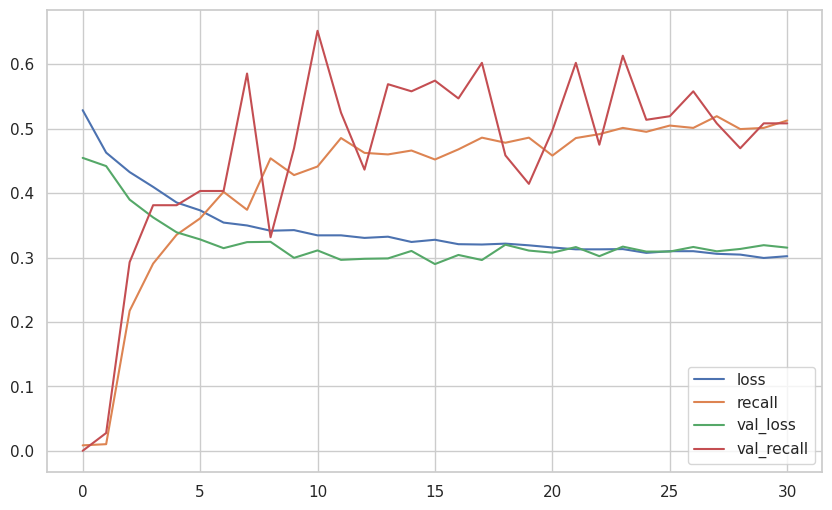

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
history = model.history.history

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
history = model.history.history

In [ ]:
model.summary()

Model: "sequential_95"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_518 (Dense)           (None, 34)                408       
                                                                 
 dense_519 (Dense)           (None, 59)                2065      
                                                                 
 dense_520 (Dense)           (None, 100)               6000      
                                                                 
 dense_521 (Dense)           (None, 43)                4343      
                                                                 
 dense_522 (Dense)           (None, 43)                1892      
                                                                 
 dense_523 (Dense)           (None, 12)                528       
                                                                 
 dense_524 (Dense)           (None, 66)              

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred)) # |
print(classification_report(y_test, y_pred)) # |

32/32 [==============================] - 0s 2ms/step
[[756  40]
 [104 100]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       796
           1       0.71      0.49      0.58       204

    accuracy                           0.86      1000
   macro avg       0.80      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



32/32 [==============================] - 0s 2ms/step


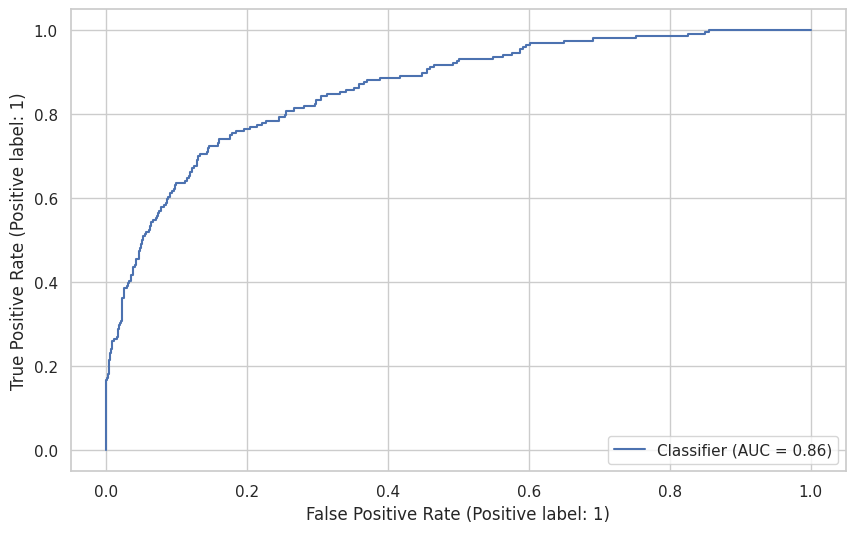

In [ ]:
y_pred_proba = model.predict(X_test)  # like ML
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [ ]:
roc_auc_score(y_test, y_pred_proba)

0.8615873485072422

# Final Model and Model Deployment

In [ ]:
import pickle

pickle.dump(scaler, open("scaler", "wb"))

In [ ]:
#loss_df = pd.DataFrame(history)  # history = model.history.history, die bezieht sich jetzt auf den Lauf mit optuna (mit epochs=100,)
#loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.34332168102264404
accuracy:  0.4901960790157318


In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 962us/step
[[756  40]
 [104 100]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       796
           1       0.71      0.49      0.58       204

    accuracy                           0.86      1000
   macro avg       0.80      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



In [ ]:
model.save("model_churn.h5")

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_churn = load_model("model_churn.h5") # |
scaler_cancer = pickle.load(open("scaler", "rb")) # |

## Prediction

In [ ]:
Exited_YES_NO = df.drop("Exited", axis=1).iloc[0:1, :]
Exited_YES_NO

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,0,0,0


In [ ]:
Exited_YES_NO = scaler.transform(Exited_YES_NO)  # we need to do transform with scaler, what's the zshg zw. scaler und transorm?
Exited_YES_NO

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 0.        , 0.        ,
        0.        ]])

In [ ]:
(model_churn.predict(Exited_YES_NO) > 0.5).astype("int32")

1/1 [==============================] - 0s 73ms/step


array([[0]], dtype=int32)

In [ ]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___